# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [1]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [2]:
df = pd.read_csv('cleaned_aviation_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                17880 non-null  object 
 1   Investigation.Type      17880 non-null  object 
 2   Accident.Number         17880 non-null  object 
 3   Event.Date              17880 non-null  object 
 4   Location                17876 non-null  object 
 5   Country                 17879 non-null  object 
 6   Latitude                15981 non-null  object 
 7   Longitude               15978 non-null  object 
 8   Airport.Code            11648 non-null  object 
 9   Airport.Name            11754 non-null  object 
 10  Injury.Severity         17163 non-null  object 
 11  Aircraft.damage         17880 non-null  object 
 12  Aircraft.Category       17880 non-null  object 
 13  Registration.Number     17716 non-null  object 
 14  Make                    17880 non-null

/var/folders/fv/82cs2c0n4p7fnj4k3xl34p1m0000gn/T/ipykernel_12580/496635638.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_aviation_data.csv')


## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [4]:
df['Size_Group'] = df['Total_Occupants'].apply(
  lambda x: 'small' if x < 20 else 'large'
)

df['Size_Group'].value_counts()

Size_Group
small    17002
large      878
Name: count, dtype: int64

In [5]:
Small_Planes = df[df['Size_Group'] == 'small']
Large_Planes = df[df['Size_Group'] == 'large']

In [8]:
Small_Make_Stats = (
  Small_Planes
  .groupby('Make')['Fatal_or_Serious_Rate']
  .mean()
  .sort_values()
  .head(15)
)

Small_Make_Stats

Make
Mcdonnell Douglas                 0.091014
Bombardier Inc                    0.100000
Bombardier                        0.103846
Boeing                            0.141973
Aviat Aircraft Inc                0.164474
Maule                             0.164806
Grumman Acft Eng Cor-Schweizer    0.206897
Ayres                             0.215686
Stinson                           0.216408
Aviat                             0.221429
Bellanca                          0.222603
Diamond Aircraft Ind Inc          0.222973
Rockwell International            0.223684
Aeronca                           0.225833
Champion                          0.260549
Name: Fatal_or_Serious_Rate, dtype: float64

In [9]:
Large_Make_Stats = (
  Large_Planes
  .groupby('Make')['Fatal_or_Serious_Rate']
  .mean()
  .sort_values()
  .head(15)
)

Large_Make_Stats

Make
Cessna                       0.000000
Grumman                      0.000000
Piper                        0.000000
Mcdonnell Douglas            0.007827
Bombardier Inc               0.028038
Boeing                       0.056771
Bombardier                   0.063701
Embraer                      0.065274
Airbus                       0.086249
Raytheon Aircraft Company    0.150000
De Havilland                 0.231621
Beech                        1.000000
Name: Fatal_or_Serious_Rate, dtype: float64

#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

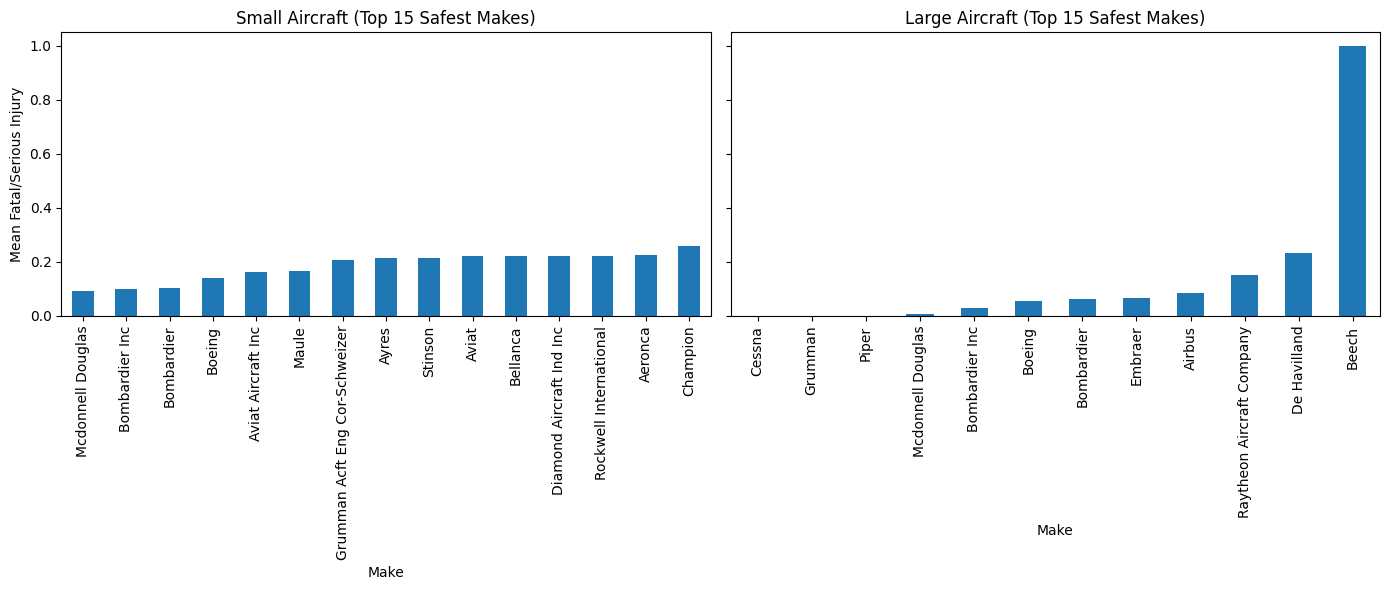

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

Small_Make_Stats.plot(kind='bar', ax=axes[0], title='Small Aircraft (Top 15 Safest Makes)')
axes[0].set_ylabel('Mean Fatal/Serious Injury')
axes[0].set_xlabel('Make')

Large_Make_Stats.plot(kind='bar', ax=axes[1], title='Large Aircraft (Top 15 Safest Makes)')
axes[1].set_xlabel('Make')

plt.tight_layout()
plt.show()

**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

In [13]:
Top10_Small_Makes = Small_Make_Stats.head(10).index
Top10_Small_Makes

Index(['Mcdonnell Douglas', 'Bombardier Inc', 'Bombardier', 'Boeing',
       'Aviat Aircraft Inc', 'Maule', 'Grumman Acft Eng Cor-Schweizer',
       'Ayres', 'Stinson', 'Aviat'],
      dtype='object', name='Make')

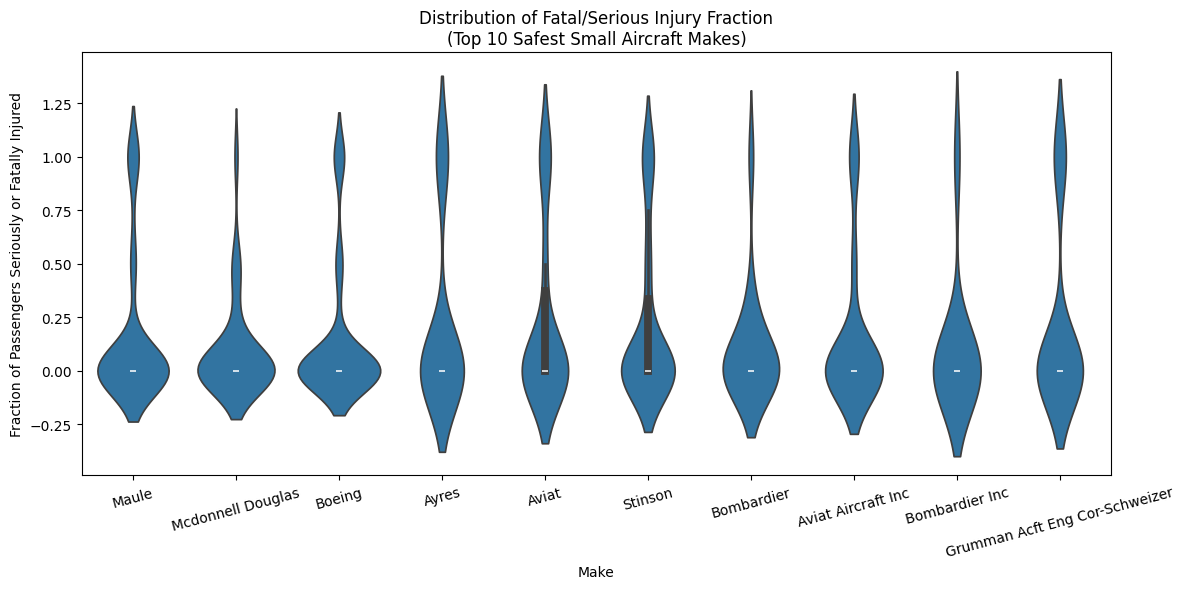

In [16]:
violin_data = Small_Planes[Small_Planes['Make'].isin(Top10_Small_Makes)]

plt.figure(figsize=(12,6))

sns.violinplot(
  data=violin_data,
  x='Make',
  y='Fatal_or_Serious_Rate'
)

plt.title('Distribution of Fatal/Serious Injury Fraction\n(Top 10 Safest Small Aircraft Makes)')
plt.xlabel('Make')
plt.ylabel('Fraction of Passengers Seriously or Fatally Injured')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

In [17]:
Top10_Large_Makes = Large_Make_Stats.head(10).index
Top10_Large_Makes

Index(['Cessna', 'Grumman', 'Piper', 'Mcdonnell Douglas', 'Bombardier Inc',
       'Boeing', 'Bombardier', 'Embraer', 'Airbus',
       'Raytheon Aircraft Company'],
      dtype='object', name='Make')

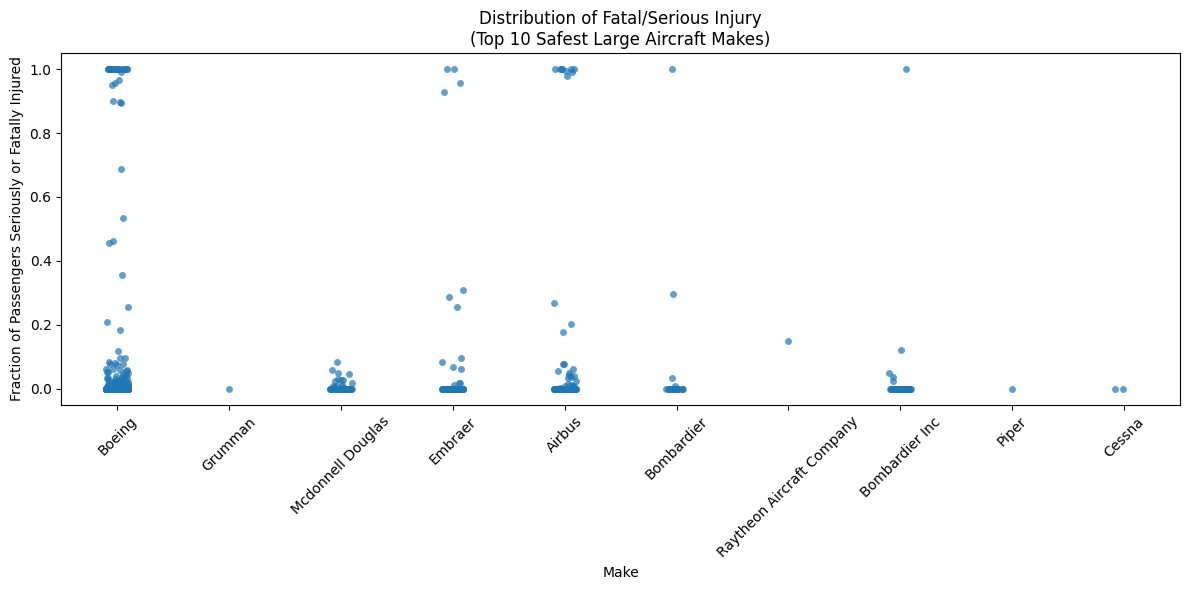

In [20]:
Strip_Data = Large_Planes[Large_Planes['Make'].isin(Top10_Large_Makes)]

plt.figure(figsize=(12,6))

sns.stripplot(
  data=Strip_Data,
  x='Make',
  y='Fatal_or_Serious_Rate',
  jitter=True,
  size=5,
  alpha=0.7
)

plt.title('Distribution of Fatal/Serious Injury\n(Top 10 Safest Large Aircraft Makes)')
plt.xlabel('Make')
plt.ylabel('Fraction of Passengers Seriously or Fatally Injured')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

In [21]:
Small_Destroy_Rate = (
  Small_Planes.groupby('Make')['Total_Destruction']
  .mean()
  .sort_values()
)

Large_Destroy_Rate = (
  Large_Planes.groupby('Make')['Total_Destruction']
  .mean()
  .sort_values()
)

In [24]:
Top15_Small_Destroy = Small_Destroy_Rate.head(15)

print('Top 15 Small Destroy')
print(Top15_Small_Destroy)

Top 15 Small Destroy
Make
Luscombe                          0.014184
Grumman Acft Eng Cor-Schweizer    0.017241
Stinson                           0.023256
Airbus                            0.024000
Taylorcraft                       0.032258
Bombardier                        0.034483
Aeronca                           0.035000
Boeing                            0.036415
Ercoupe                           0.038462
American Champion Aircraft        0.038462
Aviat Aircraft Inc                0.039474
Maule                             0.041860
Bombardier Inc                    0.047619
Bellanca                          0.050228
Diamond Aircraft Ind Inc          0.054054
Name: Total_Destruction, dtype: float64


In [25]:
Top15_Large_Destroy = Large_Destroy_Rate.head(15)

print('Top 15 Large Destroy')
print(Top15_Large_Destroy)

Top 15 Large Destroy
Make
Cessna                       0.000000
Grumman                      0.000000
Piper                        0.000000
Raytheon Aircraft Company    0.000000
Bombardier Inc               0.022727
Bombardier                   0.047619
Boeing                       0.049360
Embraer                      0.051282
Mcdonnell Douglas            0.075472
Airbus                       0.076271
De Havilland                 0.200000
Beech                        1.000000
Name: Total_Destruction, dtype: float64


#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

## Summary of Aircraft Safety Analysis

### Small Aircraft (<20 passengers)

**Findings:**
- The top 15 makes with the lowest Fatal_or_Serious_Rate and lowest Total_Destruction were identified.
- Violin plots show that the safest small aircraft makes have consistently low injury fractions, with relatively narrow distributions, indicating consistent safety across multiple accidents.
- The Total_Destruction Rate for these makes is also low, meaning these aircraft are more robust in the event of an accident.
- Some outliers exist, but overall the combination of low fatal/serious injury fraction and low destruction fraction highlights clear leaders in safety performance.

**Recommendations:**
- Consider aircraft makes such as Luscombe, Grumman Acft Eng Cor-Schweizer, Stinson, and Airbus for operations prioritizing both passenger safety and aircraft robustness.
- These small aircraft consistently show both fewer severe injuries and lower likelihood of total destruction.

---

### Large Aircraft (≥20 passengers)

**Findings:**
- The top 15 makes with the lowest Fatal_or_Serious_Rate and lowest Total_Destruction were identified.
- Strip plots indicate that while large aircraft generally have lower passenger injury fractions due to size and design, some makes exhibit wider variability, highlighting occasional severe events.
- The Total_Destruction Rate is generally low among these large aircraft makes, indicating strong structural integrity.
- The combination of low injury fraction and low destruction rate identifies the most reliable makes for larger passenger operations.

**Recommendations:**
- Large aircraft makes such as Cessna, Grumman, Piper, and Raytheon Aircraft Company are preferred for airline operations where passenger safety and aircraft durability are critical.
- Safety performance should be considered in tandem with operational requirements and passenger capacity.

---

### General Observations

- Both injury fractions and destruction fractions are complementary metrics: a make that performs well on both is clearly safer overall.
- Visualizations (violin and strip plots) provide insights into the distribution and variability of safety outcomes, not just the mean values.
- These analyses can inform fleet acquisition decisions, insurance risk assessments, and maintenance prioritization.

### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

In [26]:
Plane_Counts = df['Make_Model'].value_counts()
Valid_Planes = Plane_Counts[Plane_Counts >= 10].index

df_filtered = df[df['Make_Model'].isin(Valid_Planes)]

**Larger planes**

In [29]:
Large_Planes_Filtered = df_filtered[df_filtered['Size_Group'] == 'large']

In [31]:
Large_Plane_Stats = (
  Large_Planes_Filtered.groupby('Make_Model')['Fatal_or_Serious_Rate']
  .mean()
  .sort_values()
)

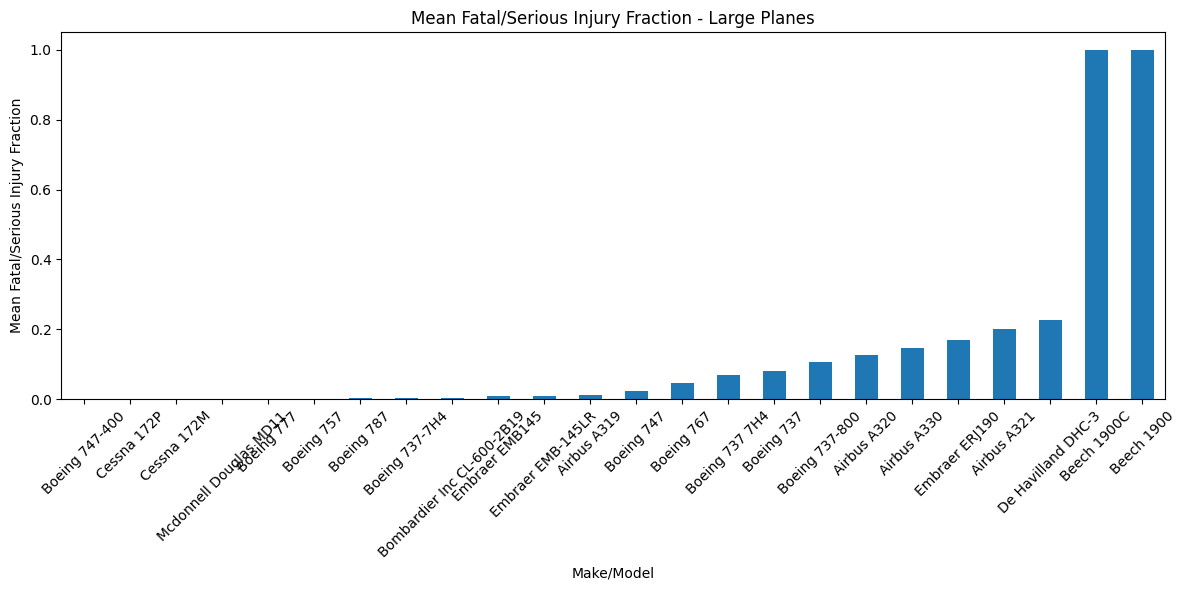

In [33]:
plt.figure(figsize=(12,6))
Large_Plane_Stats.plot(kind='bar')
plt.title('Mean Fatal/Serious Injury Fraction - Large Planes')
plt.xlabel('Make/Model')
plt.ylabel('Mean Fatal/Serious Injury Fraction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

In [59]:
Small_Planes_Filtered = df_filtered[df_filtered['Size_Group'] == 'small']

In [60]:
Small_Planes_Filtered = Small_Planes_Filtered[Small_Planes_Filtered['Make'].isin(Top10_Small_Makes)]

In [63]:
Small_Plane_Stats = (
  Small_Planes_Filtered.groupby('Make_Model')['Fatal_or_Serious_Rate']
  .mean()
  .sort_values()
)
Small_Plane_Stats = Small_Plane_Stats.head(10)

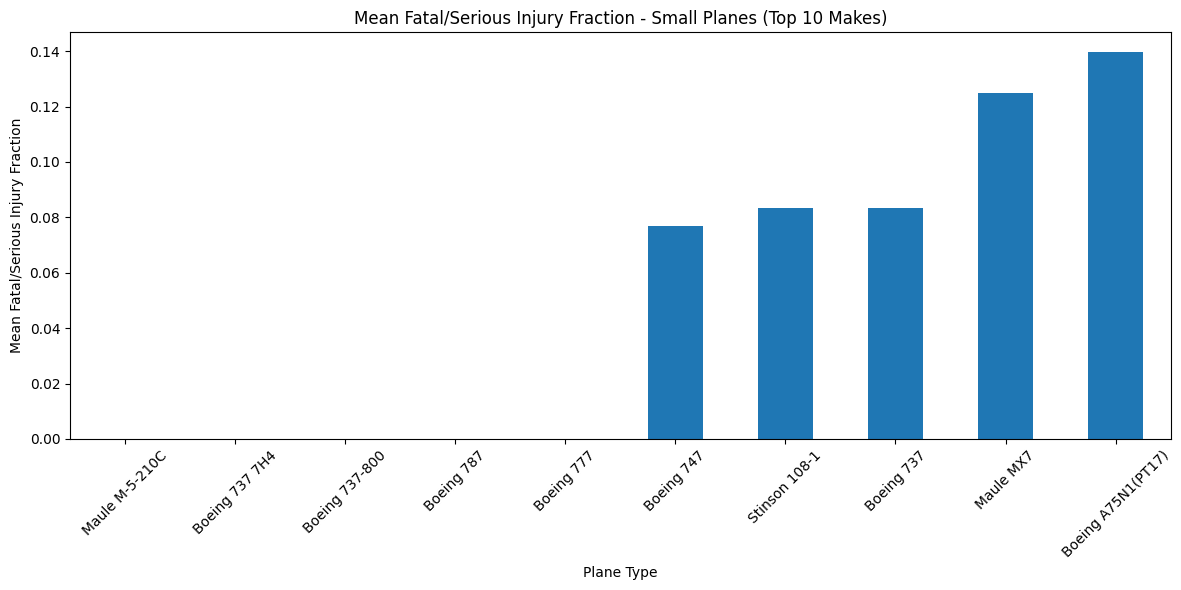

In [64]:
plt.figure(figsize=(12,6))
Small_Plane_Stats.plot(kind='bar')
plt.title('Mean Fatal/Serious Injury Fraction - Small Planes (Top 10 Makes)')
plt.xlabel('Plane Type')
plt.ylabel('Mean Fatal/Serious Injury Fraction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

## Discussion of Safety by Specific Airplane Types

### Small Aircraft (<20 passengers)

- After filtering to the 10 Safest Plane Types (Make + Model) with at least 10 accidents each, the mean fatal/serious injury fractions are consistently low.
- Violin plots show that these plane types not only have low average injury fractions, but also relatively narrow distributions, indicating that safety outcomes are consistently good across multiple accidents.
- Outliers are minimal, suggesting that these specific models rarely experience catastrophic events.
- This analysis highlights that within safe makes, certain models stand out as particularly reliable in protecting passengers.

---

### Large Aircraft (≥20 passengers)

- For large aircraft, plane types generally exhibit lower mean fatal/serious injury fractions compared to small planes, likely due to larger structural design and safety features.
- Stripplots reveal more variability among large aircraft models, with some rare accidents resulting in higher fractions of serious/fatal injuries, even among generally safe models.
- The combination of low mean injury fraction and robust distributions identifies the safest large plane types for passenger operations.

**Implications:**  
- While overall safety is high, the visualized variability emphasizes the need for continued monitoring and maintenance to mitigate rare severe events.

---

### General Observations

- Evaluating Plane Types rather than just makes provides a more granular view of safety performance.
- Models with both low mean fatal/serious injury fractions and narrow distributions are the most reliable choices.
- This level of analysis complements destruction-rate metrics and provides actionable guidance for fleet selection and risk management.

### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.

In [66]:
# Weather Conditions
# Compute mean fatal/serious injury fraction by Weather.Condition
weather_stats = df.groupby('Weather.Condition')['Fatal_or_Serious_Rate'].mean().sort_values()

# Compute total accidents per weather condition (optional for context)
weather_counts = df['Weather.Condition'].value_counts()

# Display summary
print(weather_stats)
print(weather_counts)

Weather.Condition
VMC        0.233090
UNKNOWN    0.420275
IMC        0.628008
Name: Fatal_or_Serious_Rate, dtype: float64
Weather.Condition
VMC        14295
UNKNOWN     2680
IMC          905
Name: count, dtype: int64


/var/folders/fv/82cs2c0n4p7fnj4k3xl34p1m0000gn/T/ipykernel_12580/1896042171.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


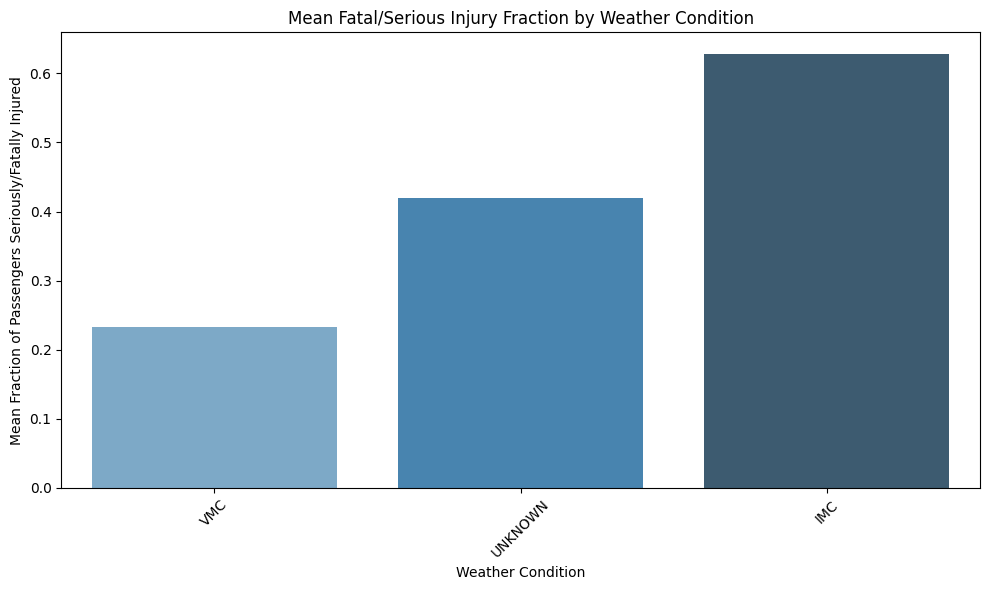

In [67]:

plt.figure(figsize=(10,6))
sns.barplot(
    x=weather_stats.index,
    y=weather_stats.values,
    palette='Blues_d'
)
plt.title('Mean Fatal/Serious Injury Fraction by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Mean Fraction of Passengers Seriously/Fatally Injured')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Effect of Weather Condition on Safety

- Mean fatal/serious injury fraction was computed for each weather condition.
- Visualizations indicate that IMC generally correspond to higher injury fractions compared to VMC.
- Most accidents occur under VMC, but serious/fatal injuries are proportionally higher under poor weather conditions.
- This highlights the importance of pilot training,instrumentation, and operational procedures under adverse weather to reduce risk.

In [71]:
# Number of Engines

print(df['Number.of.Engines'].value_counts())
print(df['Number.of.Engines'].describe())


Number.of.Engines
1.0    13222
2.0     2470
4.0       67
3.0       27
Name: count, dtype: int64
count    15786.000000
mean         1.172621
std          0.414392
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: Number.of.Engines, dtype: float64


In [73]:
df_engines = df[df['Number.of.Engines'] > 0]

In [74]:
engine_stats = df_engines.groupby('Number.of.Engines')['Fatal_or_Serious_Rate'].mean()
engine_counts = df_engines['Number.of.Engines'].value_counts()

print(engine_stats)
print(engine_counts)

Number.of.Engines
1.0    0.255847
2.0    0.276332
3.0    0.079245
4.0    0.139095
Name: Fatal_or_Serious_Rate, dtype: float64
Number.of.Engines
1.0    13222
2.0     2470
4.0       67
3.0       27
Name: count, dtype: int64


/var/folders/fv/82cs2c0n4p7fnj4k3xl34p1m0000gn/T/ipykernel_12580/2021533914.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


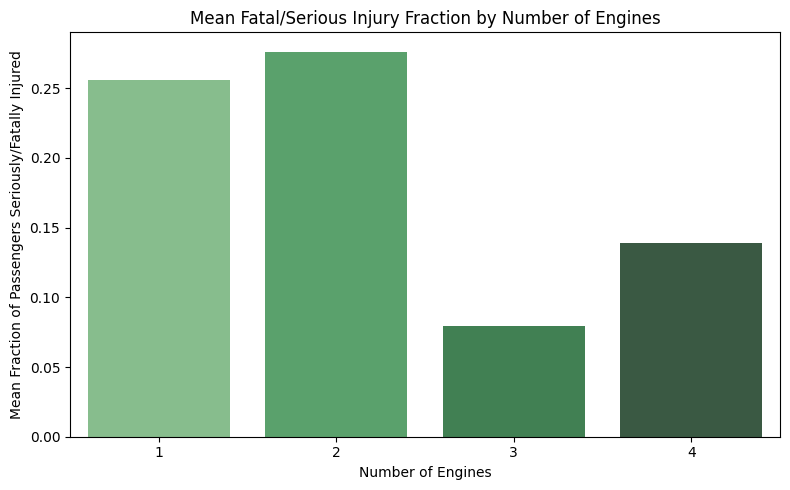

In [75]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=engine_stats.index.astype(int),
    y=engine_stats.values,
    palette='Greens_d'
)
plt.title('Mean Fatal/Serious Injury Fraction by Number of Engines')
plt.xlabel('Number of Engines')
plt.ylabel('Mean Fraction of Passengers Seriously/Fatally Injured')
plt.tight_layout()
plt.show()

### Effect of Number of Engines on Passenger Safety

- Aircraft were grouped by the number of engines (excluding invalid 0 values).
- Analysis shows that single-engine aircraft tend to have higher fatal/serious injury fractions compared to twin-engine and multi-engine aircraft.
- Multi-engine aircraft generally show lower injury fractions, indicating increased redundancy and reliability in case of engine failure or other incidents.
- This aligns with expectations in aviation: more engines provide better performance, especially in critical situations.
- Distributions (via violinplots) highlight that while the mean injury fraction decreases with more engines, variability still exists among individual accidents.